# Explain Adversarial Images
This section loads the adversarial images from [data folder](../../data/processed/adversarial_images.parq) which were generated using Fast Gradient Method. Afterwards
predictions are made. For the SHAP analysis it takes consecutive digits out of the miss-predictions.

In [25]:
import shap
import tensorflow as tf
from pandas import concat
from tensorflow.keras.models import load_model

from data.file import model_convolutional_dataset
from data.load import load_adversarial_images
from reporting.evaluation import plot_shap, first_occurence

tf.compat.v1.disable_eager_execution()

In [26]:
print("SHAP version is      :", shap.__version__)
print("Tensorflow version is:", tf.__version__)

SHAP version is      : 0.40.0
Tensorflow version is: 2.6.2


In [27]:
model = load_model(model_convolutional_dataset)

In [28]:
images, label, prediction = load_adversarial_images()
missmatches = label != prediction

The following table shows all misspredictions out of the adversarial images.

In [5]:
wrong_predictions = concat([label[missmatches], prediction[missmatches]], axis=1)
wrong_predictions

,label,prediction
0,5,3
14,1,8
16,2,7
22,9,7
24,1,2
...,...,...
1988,2,3
1989,1,8
1991,5,3
1992,4,7


This table shows a selection of consecutive adversarial images that were misspredicted. I.E. first 0 that was not properly detected, followed by 1-9.

In [24]:

concat([
    label.iloc[first_occurence(label[missmatches])],
    prediction.iloc[first_occurence(label[missmatches])],
], axis=1)




,label,prediction
246,0,5
14,1,8
16,2,7
86,3,2
53,4,9
0,5,3
106,6,5
29,7,2
31,8,3
22,9,7


## Analyze Missmatches
The following plot shows a SHAP illustration for every possible digit in the dataset. The images used were misspredicted digits out of the adversarial images.

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


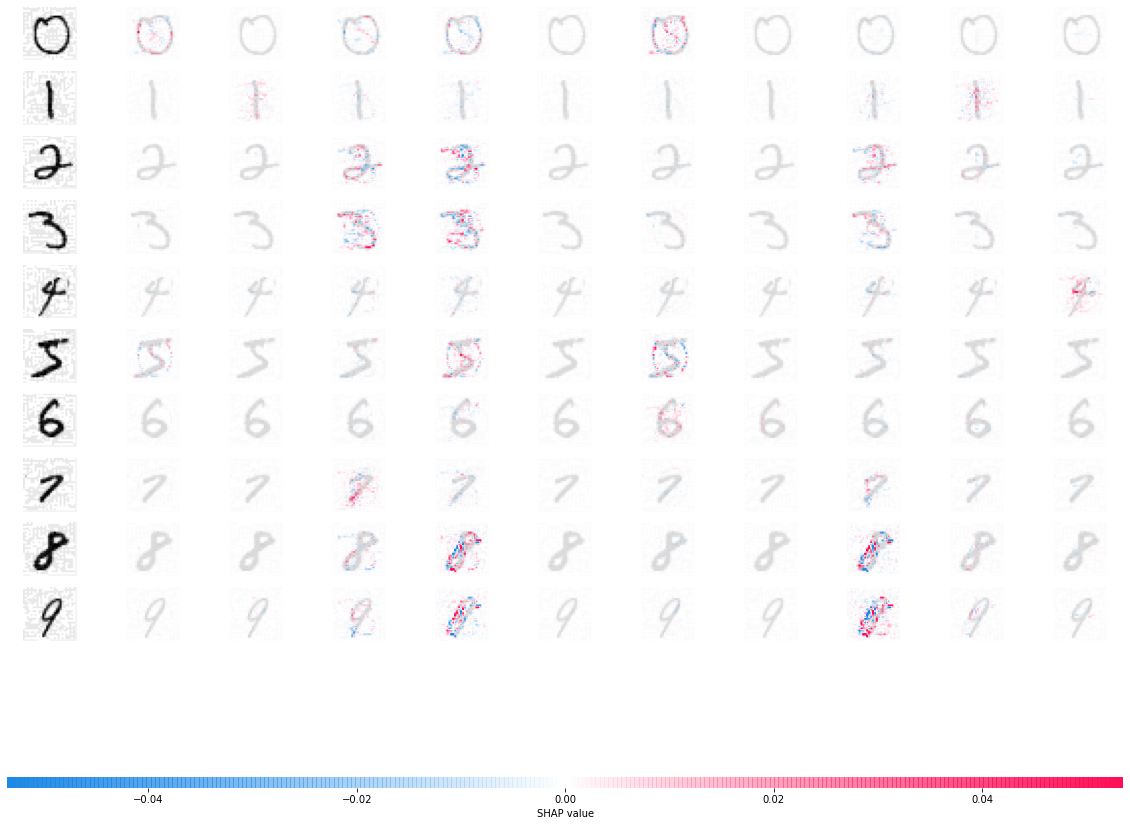

In [38]:
plot_shap(model, images[first_occurence(label[missmatches])])

While our mind seems to be pretty good in suppressing noise, our current model implementation is not. We see that the model is not only focusing on ink and takes noise into consideration when predicting digits. It seems like we have to enhance the training data using adversarial images.

**Examples:**

| Digit | Prediction | Explanation                                                     |
|-------|------------|-----------------------------------------------------------------|
| 0     | 5          | Model is focusing on the center noise and therefore predicts 5. |
| 1     | 8          | There is noise all over the place which ends up in 8.           |
| 9     | 7          | The model sees points that only exists because of the noise.    |